### import pandas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

### Load the training, testing and test_survivors titanic data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/EDA/14march_lab04_titanic/train.csv")
test = pd.read_csv("/content/drive/MyDrive/EDA/14march_lab04_titanic/test.csv")
test_survivors = pd.read_csv("/content/drive/MyDrive/EDA/14march_lab04_titanic/test_survivors.csv")

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,NaN,71.2833,C85,C
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,NaN,C123,S
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,NaN,0.0,373450,8.0500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.0000,NaN,S
887,888,1,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.0000,B42,S
888,889,0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2.0,W./C. 6607,23.4500,NaN,S
889,890,1,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.0000,C148,C


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3.0,NaN,male,34.5,0.0,0.0,330911,7.8292,NaN,Q
1,893,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S
2,894,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,Q
3,895,3.0,"Wirz, Mr. Albert",male,27.0,NaN,NaN,315154,8.6625,NaN,S
4,896,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,S


#No survival data in test case we have to concate it from test_survival

In [ ]:
test_survivors.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
sur = list(test_survivors['Survived'])
test_data = test.copy()
test_data.insert(loc = 1, column='Survived',value = sur)

In [ ]:
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3.0,NaN,male,34.5,0.0,0.0,330911,7.8292,NaN,Q
1,893,1,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S
2,894,0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,Q
3,895,0,3.0,"Wirz, Mr. Albert",male,27.0,NaN,NaN,315154,8.6625,NaN,S
4,896,1,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,S


#Now use test_data instead of test 

## Data description:
survival:	Survival	0 = No, 1 = Yes <br>
pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd; can be treated as a proxy to socio-economic status <br>
sex:	Sex	<br>
Age:	Age in years, fractional if less than one <br>
sibsp:	# of siblings / spouses aboard the Titanic <br>
parch:	# of parents / children aboard the Titanic <br>
ticket:	Ticket number <br>
fare:	Passenger fare<br>
cabin:	Cabin number<br>
embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### check how many non null values are there in each columns. check the datatype of each column

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       842 non-null    float64
 3   Name         863 non-null    object 
 4   Sex          847 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        821 non-null    float64
 7   Parch        872 non-null    float64
 8   Ticket       802 non-null    object 
 9   Fare         840 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     866 non-null    object 
dtypes: float64(5), int64(2), object(5)
memory usage: 83.7+ KB


### optimize the datatype by changing it so that it takes less space. ex convert int64 to int8 if no information is lost

point 1 :int8 / uint8 : consumes 1 byte of memory, range between -128/127 or 0/255

point 2 :float16 / int16 / uint16: consumes 2 bytes of memory, range between -32768 and 32767 or 0/65535

point 3 :If one of our column has values between 1 and 10 for example, we will reduce the size of that column from 8 bytes per row to 1 byte, which is more than 85% memory saving on that column!

In [ ]:
train.memory_usage(index=False , deep=True)

PassengerId     7128
Survived        7128
Pclass          7128
Name           73399
Sex            53675
Age             7128
SibSp           7128
Parch           7128
Ticket         53913
Fare            7128
Cabin          34344
Embarked       51028
dtype: int64

In [ ]:
train['PassengerId'] = train['PassengerId'].astype('int16')
train['Survived'] = train['Survived'].astype('int8')
train['Pclass'] = train['Pclass'].astype('float16')
train['Age'] = train['Age'].astype('float16')
train['SibSp'] = train['SibSp'].astype('float16')
train['Parch'] = train['Parch'].astype('float16')
train['Fare'] = train['Fare'].astype('float32')

In [ ]:
train.memory_usage(index=False , deep=True)

PassengerId     1782
Survived         891
Pclass          1782
Name           73399
Sex            53675
Age             1782
SibSp           1782
Parch           1782
Ticket         53913
Fare            3564
Cabin          34344
Embarked       51028
dtype: int64

In [ ]:
train.memory_usage(index=False ,deep=True)

PassengerId     1782
Survived         891
Pclass          1782
Name           73399
Sex            53675
Age             1782
SibSp           1782
Parch           1782
Ticket         53913
Fare            3564
Cabin          34344
Embarked       51028
dtype: int64

### compute the mean, std, min, max, of all the numeric columns

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,842.000000,714.000000,821.000000,872.000000,840.000000
mean,446.000000,0.383838,2.314453,29.687500,0.524902,0.385254,32.208138
std,257.353842,0.486592,0.830078,14.523438,1.112305,0.803711,50.066086
min,1.000000,0.000000,1.000000,0.419922,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329224


###QUESTION -4 survival computation:
drop any missing record for this computation.

PART A

compute the survival probability of males in training data.<br>
compute the survival probability of females in training data.<br>
compute the survival probability of childrens in training data. use an age of 16 as a threshold to determine if a passenger is a child or not.<br>
plot a simple bar plot for all the three cases. <br>

PART B

compute the survival probability of 1st class passengers.<br>
compute the survival probability of 2nd class passengers.<br>
compute the survival probability of 3rd class passengers.<br>
plot a simple bar plot for all the three cases. <br>

PART C

compute the survival probability of embark C.<br>
compute the survival probability of embark S.<br>
compute the survival probability of embark Q.<br>
plot a simple bar plot for all the three cases. <br>

PART D

From the above analysis, can you guess most of the 1st class passengers embarked from where? 
test the guess by plotting a simple bar plot of all the 3 embarkments for 1st class passengers. Highest bar should correspond to your guess embarkment.

Do all the above for testing data as well

#PART A


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.250000,NaN,S
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,NaN,71.283302,C85,C
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,NaN,C123,S
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,NaN,0.0,373450,8.050000,NaN,NaN


In [ ]:
#Droping null values
df = train[['Survived','Sex','Age']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int8   
 1   Sex       847 non-null    object 
 2   Age       714 non-null    float16
dtypes: float16(1), int8(1), object(1)
memory usage: 9.7+ KB


In [ ]:
dfresult = df.dropna()
dfresult.isna().sum()

Survived    0
Sex         0
Age         0
dtype: int64

In [ ]:
#Total count
dfresult.count()

Survived    674
Sex         674
Age         674
dtype: int64

In [ ]:
#FINDING PROBABILITY = SURVIVAL OUTCOME /TOTAL OUTCOMES
A1 = dfresult[dfresult['Survived']==1]
A11= A1['Survived'].count()
A2 = A1[A1['Sex'] == 'male']
A22 = A2['Survived'].count()
A3 = A1[A1['Sex']=='female']
A33 = A3['Survived'].count()
A4 = A1[A1['Age'] <=16]   #
A44= A4['Survived'].count()

In [ ]:
print("Probability of survived male is: ",A22/674)

Probability of survived male is:  0.129080118694362


In [ ]:
print("Probability of survived female is: ",A33/674)

Probability of survived female is:  0.2774480712166172


In [ ]:
print("Probability of survived Child is: ",A44/674)

Probability of survived Child is:  0.0771513353115727


In [ ]:
bar1 = pd.DataFrame(columns=['Sex','Probability of survival'])
bar1['Sex'] = ['Male','Female','Child']
bar1['Probability of survival'] = [A22/674,A33/674,A44/674]

<Axes: xlabel='Sex', ylabel='Probability of survival'>

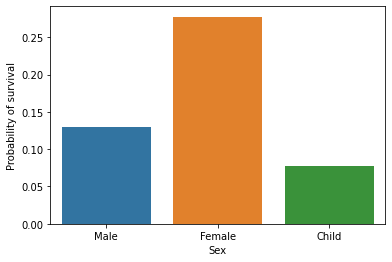

In [ ]:
sb.barplot(bar1,x ='Sex',y = 'Probability of survival')

#For traning data


In [ ]:
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3.0,NaN,male,34.5,0.0,0.0,330911,7.8292,NaN,Q
1,893,1,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S
2,894,0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,Q
3,895,0,3.0,"Wirz, Mr. Albert",male,27.0,NaN,NaN,315154,8.6625,NaN,S
4,896,1,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,S


In [ ]:
#Droping null values
df = test_data[['Survived','Sex','Age']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Sex       381 non-null    object 
 2   Age       332 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.9+ KB


In [ ]:
dfresult = df.dropna()
dfresult.isna().sum()

Survived    0
Sex         0
Age         0
dtype: int64

In [ ]:
#Total count
dfresult.count()

Survived    300
Sex         300
Age         300
dtype: int64

In [ ]:
#FINDING PROBABILITY = SURVIVAL OUTCOME /TOTAL OUTCOMES
A1 = dfresult[dfresult['Survived']==1]
A11= A1['Survived'].count()
A2 = A1[A1['Sex'] == 'male']
A22 = A2['Survived'].count()
A3 = A1[A1['Sex']=='female']
A33 = A3['Survived'].count()
A4 = A1[A1['Age'] <=16]   #
A44= A4['Survived'].count()

In [ ]:
print("Probability of survived male for testing is: ",A22/674)
print("Probability of survived female for testing is: ",A33/674)
print("Probability of survived Child for testing data is: ",A44/674)

Probability of survived male for testing is:  0.0
Probability of survived female for testing is:  0.16468842729970326
Probability of survived Child for testing data is:  0.016320474777448073


In [ ]:
bar1 = pd.DataFrame(columns=['Sex','Probability of survival'])
bar1['Sex'] = ['Male','Female','Child']
bar1['Probability of survival'] = [A22/674,A33/674,A44/674]

<Axes: xlabel='Sex', ylabel='Probability of survival'>

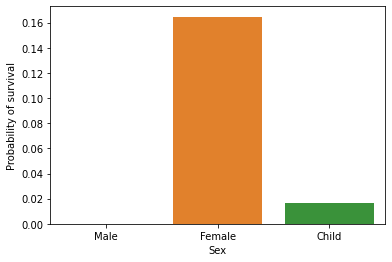

In [ ]:
sb.barplot(bar1,x ='Sex',y = 'Probability of survival')

#PART - B


compute the survival probability of 1st class passengers.<br>
compute the survival probability of 2nd class passengers.<br>
compute the survival probability of 3rd class passengers.<br>
plot a simple bar plot for all the three cases. <br>

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.250000,NaN,S
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,NaN,71.283302,C85,C
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,NaN,C123,S
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,NaN,0.0,373450,8.050000,NaN,NaN


In [ ]:
#Droping null values
df = train[['Survived','Pclass']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int8   
 1   Pclass    842 non-null    float16
dtypes: float16(1), int8(1)
memory usage: 2.7 KB


In [ ]:
dfresult = df.dropna()
dfresult.isna().sum()

Survived    0
Pclass      0
dtype: int64

In [ ]:
#Total count
dfresult.count()

Survived    842
Pclass      842
dtype: int64

In [ ]:
#FINDING PROBABILITY = SURVIVAL OUTCOME /TOTAL OUTCOMES
A1 = dfresult[dfresult['Survived']==1]
A11= A1['Survived'].count()
A2 = A1[A1['Pclass'] == 1]
A22 = A2['Survived'].count()
A3 = A1[A1['Pclass']== 2]
A33 = A3['Survived'].count()
A4 = A1[A1['Pclass']== 3]
A44 = A4['Survived'].count()

In [ ]:
print("Probability of survived 1st class is: ",A22/842)
print("Probability of survived 2nd class is: ",A33/842)
print("Probability of survived 3rd class is: ",A44/842)

Probability of survived 1st class is:  0.1496437054631829
Probability of survived 2nd class is:  0.09738717339667459
Probability of survived 3rd class is:  0.13064133016627077


In [ ]:
bar1 = pd.DataFrame(columns=['CLASS','Probability of survival'])
bar1['Pclass'] = ['1st','2nd','3rd']
bar1['Probability of survival'] = [A22/842, A33/842, A44/842]

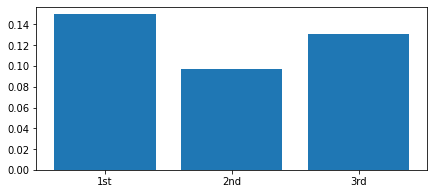

In [ ]:
# Figure Size
fig = plt.figure(figsize =(7, 3))
 
# Horizontal Bar Plot
plt.bar(bar1['Pclass'], bar1['Probability of survival'] )
 
# Show Plot
plt.show()

#FOR TESTING DATA

In [ ]:
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3.0,NaN,male,34.5,0.0,0.0,330911,7.8292,NaN,Q
1,893,1,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S
2,894,0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,Q
3,895,0,3.0,"Wirz, Mr. Albert",male,27.0,NaN,NaN,315154,8.6625,NaN,S
4,896,1,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,S


In [ ]:
#Droping null values
df = test_data[['Survived','Pclass']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    370 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.7 KB


In [ ]:
dfresult = df.dropna()
dfresult.isna().sum()

Survived    0
Pclass      0
dtype: int64

In [ ]:
#Total count
dfresult.count()

Survived    370
Pclass      370
dtype: int64

In [ ]:
#FINDING PROBABILITY = SURVIVAL OUTCOME /TOTAL OUTCOMES
A1 = dfresult[dfresult['Survived']==1]
A11= A1['Survived'].count()
A2 = A1[A1['Pclass'] == 1]
A22 = A2['Survived'].count()
A3 = A1[A1['Pclass']== 2]
A33 = A3['Survived'].count()
A4 = A1[A1['Pclass']== 3]
A44 = A4['Survived'].count()

In [ ]:
bar1 = pd.DataFrame(columns=['CLASS','Probability of survival'])
bar1['Pclass'] = ['1st','2nd','3rd']
bar1['Probability of survival'] = [A22/842, A33/842, A44/842]

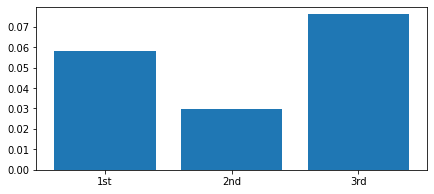

In [ ]:
# Figure Size
fig = plt.figure(figsize =(7, 3))
 
# Horizontal Bar Plot
plt.bar(bar1['Pclass'], bar1['Probability of survival'] )
 
# Show Plot
plt.show()

#PART C

compute the survival probability of embark C.<br>
compute the survival probability of embark S.<br>
compute the survival probability of embark Q.<br>
plot a simple bar plot for all the three cases. <br>

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.250000,NaN,S
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,NaN,71.283302,C85,C
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,NaN,C123,S
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,NaN,0.0,373450,8.050000,NaN,NaN


In [ ]:
#Droping null values
df = train[['Survived','Embarked']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int8  
 1   Embarked  866 non-null    object
dtypes: int8(1), object(1)
memory usage: 8.0+ KB


In [ ]:
dfresult = df.dropna()
dfresult.isna().sum()

Survived    0
Embarked    0
dtype: int64

In [ ]:
#Total count
dfresult.count()

Survived    866
Embarked    866
dtype: int64

In [ ]:
#FINDING PROBABILITY = SURVIVAL OUTCOME /TOTAL OUTCOMES
A1 = dfresult[dfresult['Survived']==1]
A11= A1['Survived'].count()
A2 = A1[A1['Embarked'] == 'C']
A22 = A2['Survived'].count()
A3 = A1[A1['Embarked']== 'S']
A33 = A3['Survived'].count()
A4 = A1[A1['Embarked']== 'Q']
A44 = A4['Survived'].count()

In [ ]:
print("Probability of survived Embarked of C class is: ",A22/866)
print("Probability of survived Embarked of S is: ",A33/866)
print("Probability of survived Embarked of Q is: ",A44/866)

Probability of survived Embarked of C class is:  0.10161662817551963
Probability of survived Embarked of S is:  0.24826789838337182
Probability of survived Embarked of Q is:  0.03348729792147806


In [ ]:
bar1 = pd.DataFrame(columns=['EMBARKED','Probability of survival'])
bar1['EMBARKED'] = ['C','S','Q']
bar1['Probability of survival'] = [A22/866, A33/866, A44/866]

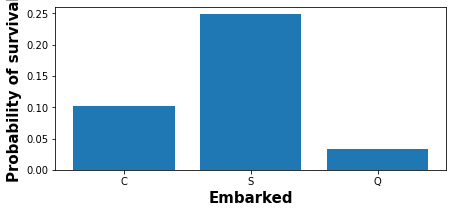

In [ ]:
# Figure Size
fig = plt.figure(figsize =(7, 3))
 
# Horizontal Bar Plot
plt.bar(bar1['EMBARKED'], bar1['Probability of survival'] )
plt.xlabel('Embarked', fontweight ='bold', fontsize = 15)
plt.ylabel('Probability of survival', fontweight ='bold', fontsize = 15)
 
# Show Plot
plt.show()

#For testing data

In [ ]:
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3.0,NaN,male,34.5,0.0,0.0,330911,7.8292,NaN,Q
1,893,1,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S
2,894,0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,Q
3,895,0,3.0,"Wirz, Mr. Albert",male,27.0,NaN,NaN,315154,8.6625,NaN,S
4,896,1,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,S


In [ ]:
#Droping null values
df = test_data[['Survived','Embarked']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  418 non-null    int64 
 1   Embarked  406 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.7+ KB


In [ ]:
dfresult = df.dropna()
dfresult.isna().sum()

Survived    0
Embarked    0
dtype: int64

In [ ]:
#Total count
dfresult.count()

Survived    406
Embarked    406
dtype: int64

In [ ]:
#FINDING PROBABILITY = SURVIVAL OUTCOME /TOTAL OUTCOMES
A1 = dfresult[dfresult['Survived']==1]
A11= A1['Survived'].count()
A2 = A1[A1['Embarked'] == 'C']
A22 = A2['Survived'].count()
A3 = A1[A1['Embarked']== 'S']
A33 = A3['Survived'].count()
A4 = A1[A1['Embarked']== 'Q']
A44 = A4['Survived'].count()

In [ ]:
print("Probability of survived Embarked of C class for testing data is: ",A22/866)
print("Probability of survived Embarked of S for testing data is: ",A33/866)
print("Probability of survived Embarked of Q for testing data is: ",A44/866)

Probability of survived Embarked of C class for testing data is:  0.046189376443418015
Probability of survived Embarked of S for testing data is:  0.09930715935334873
Probability of survived Embarked of Q for testing data is:  0.02771362586605081


In [ ]:
bar1 = pd.DataFrame(columns=['EMBARKED','Probability of survival'])
bar1['EMBARKED'] = ['C','S','Q']
bar1['Probability of survival'] = [A22/866, A33/866, A44/866]

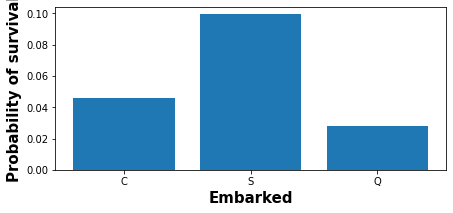

In [ ]:
# Figure Size
fig = plt.figure(figsize =(7, 3))
 
# Horizontal Bar Plot
plt.bar(bar1['EMBARKED'], bar1['Probability of survival'] )
plt.xlabel('Embarked', fontweight ='bold', fontsize = 15)
plt.ylabel('Probability of survival', fontweight ='bold', fontsize = 15)
 
# Show Plot
plt.show()

#PART D

From the above analysis, can you guess most of the 1st class passengers embarked from where? 
test the guess by plotting a simple bar plot of all the 3 embarkments for 1st class passengers. Highest bar should correspond to your guess embarkment.

Do all the above for testing data as well

In [ ]:
#Droping null values
df = train[['Survived','Embarked','Pclass']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int8   
 1   Embarked  866 non-null    object 
 2   Pclass    842 non-null    float16
dtypes: float16(1), int8(1), object(1)
memory usage: 9.7+ KB


In [ ]:
dfresult = df.dropna()
dfresult.isna().sum()

Survived    0
Embarked    0
Pclass      0
dtype: int64

In [ ]:
#Total count
dfresult.count()

Survived    821
Embarked    821
Pclass      821
dtype: int64

In [ ]:
#FINDING PROBABILITY = SURVIVAL OUTCOME /TOTAL OUTCOMES
A1 = dfresult[dfresult['Survived']==1]
A1 = dfresult[dfresult['Pclass']== 1]
A11= A1['Survived'].count()
A2 = A1[A1['Embarked'] == 'C']
A22 = A2['Survived'].count()
A3 = A1[A1['Embarked']== 'S']
A33 = A3['Survived'].count()
A4 = A1[A1['Embarked']== 'Q']
A44 = A4['Survived'].count()

In [ ]:
print("Probability of survived Embarked of C in 1st class is: ",A22/821)
print("Probability of survived Embarked of S in 1st class is: ",A33/821)
print("Probability of survived Embarked of Q in 1st class is: ",A44/821)

Probability of survived Embarked of C in 1st class is:  0.09135200974421437
Probability of survived Embarked of S in 1st class is:  0.13885505481120586
Probability of survived Embarked of Q in 1st class is:  0.00243605359317905


In [ ]:
bar1 = pd.DataFrame(columns=['EMBARKED','Probability of survival'])
bar1['EMBARKED'] = ['C','S','Q']
bar1['Probability of survival'] = [A22/821, A33/821, A44/821]

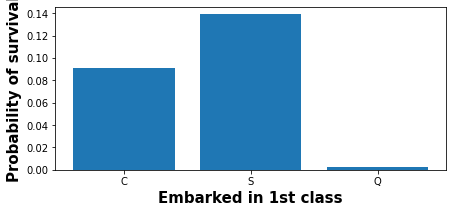

In [ ]:
# Figure Size
fig = plt.figure(figsize =(7, 3))
 
# Horizontal Bar Plot
plt.bar(bar1['EMBARKED'], bar1['Probability of survival'] )
plt.xlabel('Embarked in 1st class', fontweight ='bold', fontsize = 15)
plt.ylabel('Probability of survival', fontweight ='bold', fontsize = 15)
 
# Show Plot
plt.show()

#Most of the 1st class passengers embarked from S in training data

#FOR TESTING DATA

In [ ]:
#Droping null values
df = test_data[['Survived','Embarked','Pclass']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Embarked  406 non-null    object 
 2   Pclass    370 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.9+ KB


In [ ]:
dfresult = df.dropna()
dfresult.isna().sum()

Survived    0
Embarked    0
Pclass      0
dtype: int64

In [ ]:
#Total count
dfresult.count()

Survived    359
Embarked    359
Pclass      359
dtype: int64

In [ ]:
#FINDING PROBABILITY = SURVIVAL OUTCOME /TOTAL OUTCOMES
A1 = dfresult[dfresult['Survived']==1]
A1 = dfresult[dfresult['Pclass']== 1]
A11= A1['Survived'].count()
A2 = A1[A1['Embarked'] == 'C']
A22 = A2['Survived'].count()
A3 = A1[A1['Embarked']== 'S']
A33 = A3['Survived'].count()
A4 = A1[A1['Embarked']== 'Q']
A44 = A4['Survived'].count()

In [ ]:
print("Probability of survived Embarked of C in 1st class in TESTING DATA is: ",A22/821)
print("Probability of survived Embarked of S in 1st class in TESTING DATA is: ",A33/821)
print("Probability of survived Embarked of Q in 1st class in TESTING DATA is: ",A44/821)

Probability of survived Embarked of C in 1st class in TESTING DATA is:  0.06090133982947625
Probability of survived Embarked of S in 1st class in TESTING DATA is:  0.0535931790499391
Probability of survived Embarked of Q in 1st class in TESTING DATA is:  0.001218026796589525


In [ ]:
bar1 = pd.DataFrame(columns=['EMBARKED','Probability of survival'])
bar1['EMBARKED'] = ['C','S','Q']
bar1['Probability of survival'] = [A22/821, A33/821, A44/821]

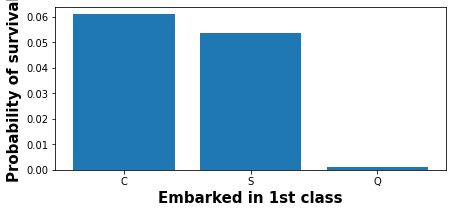

In [ ]:
# Figure Size
fig = plt.figure(figsize =(7, 3))
 
# Horizontal Bar Plot
plt.bar(bar1['EMBARKED'], bar1['Probability of survival'] )
plt.xlabel('Embarked in 1st class', fontweight ='bold', fontsize = 15)
plt.ylabel('Probability of survival', fontweight ='bold', fontsize = 15)
 
# Show Plot
plt.show()

#Most of the 1st class passengers embarked from C in testing data

###Q 5
Detect and remove the outliers in numeric variables:
make a custom function using the Tukey method to detect outliers. <br>
Remove the outlier rows and reset the index.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.250000,NaN,S
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,NaN,71.283302,C85,C
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,NaN,C123,S
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,NaN,0.0,373450,8.050000,NaN,NaN


In [ ]:
def det_outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    data = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    data = data.reset_index(drop=True)

    print("Number of outliers detected: ", len(outliers))
    return data


#For training data

In [ ]:
train_data = det_outliers(train,'Age')
train_data

Number of outliers detected:  11


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.250000,NaN,S
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,NaN,71.283302,C85,C
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,NaN,C123,S
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,NaN,0.0,373450,8.050000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
698,886,0,3.0,"Rice, Mrs. William (Margaret Norton)",female,39.0,0.0,5.0,382652,29.125000,NaN,Q
699,887,0,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.000000,NaN,S
700,888,1,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.000000,B42,S
701,890,1,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.000000,C148,C


#For testing data

In [ ]:
test_data = det_outliers(test_data,'Age')
test_data

Number of outliers detected:  2


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3.0,NaN,male,34.5,0.0,0.0,330911,7.8292,NaN,Q
1,893,1,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S
2,894,0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,Q
3,895,0,3.0,"Wirz, Mr. Albert",male,27.0,NaN,NaN,315154,8.6625,NaN,S
4,896,1,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
325,1301,1,3.0,"Peacock, Miss. Treasteall",NaN,3.0,1.0,1.0,SOTON/O.Q. 3101315,13.7750,NaN,S
326,1303,1,1.0,"Minahan, Mrs. William Edward (Lillian E Thorpe)",NaN,37.0,1.0,0.0,19928,90.0000,C78,Q
327,1304,1,3.0,"Henriksson, Miss. Jenny Lovisa",NaN,28.0,0.0,0.0,347086,7.7750,NaN,S
328,1306,1,1.0,"Oliva y Ocana, Dona. Fermina",female,39.0,0.0,0.0,PC 17758,108.9000,C105,C


### Dropping features:
drop those features/columns which are useless for data analysis and predictions, ex, passengerID

#For trainging data

In [ ]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_data.drop(columns=['PassengerId','Parch','Ticket','Cabin'],inplace=True)

In [ ]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Fare',
       'Embarked'],
      dtype='object')

**For Testing Data:**

In [ ]:
test_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
test_data.drop(columns=['PassengerId','Parch','Ticket','Cabin'],inplace=True)

In [ ]:
test_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Fare',
       'Embarked'],
      dtype='object')

### filling missing values:
use different imputing techiniques like median, mean, mode etc to fill in missing values. play around to obtain the best model prediction accuracy in the end.<br>
Find a way to use "name" column to fill "Sex" column rows.

**For Training Data:**

In [ ]:
train_data.isnull().sum()

Survived     0
Pclass      37
Name        21
Sex         40
Age          0
SibSp       56
Fare        40
Embarked    22
dtype: int64

#We have removed the outlier so we can put mean or median in numeric value and mode in string

In [ ]:
train_data.Pclass.fillna(train_data['Pclass'].mode()[0],inplace=True)

In [ ]:
null_index_Sex = np.where(train_data['Sex'].isna())[0]

In [ ]:
for i in null_index_Sex:
    if 'Mr.' in str(train_data['Name'][i]):
        train_data['Sex'][i] = 'male'
    else:
        train_data['Sex'][i] = 'female'

<ipython-input-78-2eb1ad21a7a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Sex'][i] = 'male'
<ipython-input-78-2eb1ad21a7a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Sex'][i] = 'female'


In [ ]:
train_data.Age.fillna(train_data['Age'].mean(),inplace=True)

In [ ]:
train_data.SibSp.fillna(train_data['SibSp'].mode()[0],inplace=True)

In [ ]:
train_data.Fare.fillna(train_data['Fare'].mean(),inplace=True)

In [ ]:
train_data.Embarked.fillna(train_data['Embarked'].mode()[0],inplace=True)

Now, we remove variable **Name** from train data because of no more further use.

In [ ]:
train_data.drop(columns=['Name'],inplace=True)

In [ ]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

#For test data

In [ ]:
test_data.isnull().sum()

Survived     0
Pclass      35
Name        32
Sex         32
Age          0
SibSp       42
Fare        26
Embarked    11
dtype: int64

In [ ]:
test_data.Pclass.fillna(test_data['Pclass'].mode()[0],inplace=True)

In [ ]:
null_index_Sex = np.where(test_data['Sex'].isna())[0]

In [ ]:
for i in null_index_Sex:
    if 'Mr.' in str(test_data['Name'][i]):
        test_data['Sex'][i] = 'male'
    else:
        test_data['Sex'][i] = 'female'

<ipython-input-88-369daf2d2491>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Sex'][i] = 'male'
<ipython-input-88-369daf2d2491>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Sex'][i] = 'female'


In [ ]:
test_data.Age.fillna(test_data['Age'].mean(),inplace=True)

In [ ]:
test_data.SibSp.fillna(test_data['SibSp'].mode()[0],inplace=True)

In [ ]:
test_data.Fare.fillna(test_data['Fare'].mean(),inplace=True)

In [ ]:
test_data.Embarked.fillna(test_data['Embarked'].mode()[0],inplace=True)

In [ ]:
test_data.drop(columns=['Name'],inplace=True)

In [ ]:
test_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

### data encoding:
machine learning models require their inputs to be integers so we need to convert categorical values into numeric values. One way to do this is by simply encode the values. For the Sex feature, encode/replace female as 0 and male as 1. For the Embarked feature, Encode/replace S as 0, C as 1 and Q as 2. <br>
you can also use one hot encoding by searching the web

#For Training data

In [ ]:
Sex = {"female": 0, "male": 1}
Embarked = {'S': 0, 'C': 1, 'Q': 2}

In [ ]:
train_data['Sex'] = train_data['Sex'].map(Sex)
train_data['Embarked'] = train_data['Embarked'].map(Embarked)

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3.0,1,22.0,1.0,7.250000,0
1,1,1.0,0,38.0,1.0,71.283302,1
2,1,3.0,0,26.0,0.0,7.925000,0
3,1,1.0,0,35.0,1.0,34.704979,0
4,0,3.0,1,35.0,0.0,8.050000,0


#For testing

In [ ]:
test_data['Sex'] = test_data['Sex'].map(Sex)
test_data['Embarked'] = test_data['Embarked'].map(Embarked)
test_data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3.0,1,34.5,0.0,7.8292,2
1,1,3.0,0,47.0,1.0,7.0000,0
2,0,2.0,1,62.0,0.0,9.6875,2
3,0,3.0,1,27.0,0.0,8.6625,0
4,1,3.0,0,22.0,1.0,12.2875,0


### prediction
we will be using simple logistic regression to predict survivability. 

In [ ]:
# Logistic regression code:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def LOR(X_train, Y_train, X_test, Y_test):
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=0.8)
    lor = LogisticRegression()
    lor.fit(X_train, Y_train)

    acc_log = round(lor.score(X_val, Y_val) * 100, 2)
    test_acc_log = round(lor.score(X_test, Y_test) * 100, 2)
    return acc_log, test_acc_log

# Ex, if train.csv is saved by the name train_df then X_train will contain all the columns which you think are relevant in prediction, like train_df["Pclass", "Fare", ...]
# Y_train will be train_df["Survived"]
# same for test.csv to obtain X_test
# if test_survivors.csv is saved by the name test_survivors_df then Y_test will be test_survivors_df["Survived"]

In [ ]:
X_train = train_data.iloc[:,1:]
Y_train = train_data.iloc[:,0]
X_test = test_data.iloc[:,1:]
Y_test = test_data.iloc[:,0]

In [ ]:
val_pred, test_pred = LOR(X_train, Y_train, X_test, Y_test)
val_pred, test_pred

(73.05, 95.76)

### make changes to your outlier detection, feature dropping, filling missing values and data encoding such that validation prediction and test prediction are maximized.